<a href="https://colab.research.google.com/github/danielrodriguez007/Data_Analysis/blob/main/Rappi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries and dataset 📚

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.cluster import KMeans
import plotly.express as px
plt.style.use('fivethirtyeight')

In [3]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Colab Notebooks/Kaggle'

In [4]:
!kaggle datasets download -d alexbonella/sales-simulation-at-rappi

  0% 0.00/492k [00:00<?, ?B/s]
100% 492k/492k [00:00<00:00, 118MB/s]


In [5]:
!unzip '/content/sales-simulation-at-rappi.zip' && rm '/content/sales-simulation-at-rappi.zip'

Archive:  /content/sales-simulation-at-rappi.zip
  inflating: Sales_simulation.csv    


In [6]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2023/Sales_simulation.csv')
data.tail()

Unnamed: 0  purchase_ID             Date at created  \
23225       23225        23226  21-10-2020 16:24:40.930923   
23226       23226        23227  21-10-2020 16:24:41.353098   
23227       23227        23228  21-10-2020 16:24:41.673074   
23228       23228        23229  21-10-2020 16:24:42.096380   
23229       23229        23230  21-10-2020 16:24:42.366544   

                 Category                   Name  Purchase Price  \
23225  Desayunos · Típica           La Frijolada            8900   
23226              Típica          Sopitas y Más           31800   
23227  Desayunos · Típica       Calentao Express           23000   
23228   Desayunos · Árabe  Boniato Sabores Vivos           37900   
23229              Típica           Bandejas Mrg           17800   

       Delivery Price  Total  
23225            4500  13400  
23226            4200  36000  
23227            6000  29000  
23228            5300  43200  
23229            3800  21600

#Explore and clean data 🧹 ☁

In [7]:
data.shape

(23230, 8)

In [8]:
data.isnull().sum()

Unnamed: 0         0
purchase_ID        0
Date at created    0
Category           0
Name               0
Purchase Price     0
Delivery Price     0
Total              0
dtype: int64

In [9]:
data['Date at created'] = pd.to_datetime(data['Date at created'])

In [10]:
pv = pd.pivot_table(data, index ='Category', values='purchase_ID', aggfunc='count').sort_values('purchase_ID')
pv

purchase_ID
Category                                       
Sushi · Desayunos                            77
Alta Cocina · Italiana                       81
Hamburguesas · Panadería                     81
Perros Calientes                             81
Hamburguesas · Pescados y Mariscos           86
...                                         ...
Desayunos                                  1337
Saludable · Desayunos                      1538
Desayunos · Típica                         1586
Típica                                     1719
Postres · Desayunos                        1770

[74 rows x 1 columns]

In [11]:
data['Hour'] = data['Date at created'].apply(lambda x : x.hour).astype(str)
data['Minutes'] = data['Date at created'].apply(lambda x : x.minute).astype(str)
data['FinalHour'] = data[['Hour','Minutes']].agg(':'.join, axis=1)

In [12]:
data['FinalHour'] = data['FinalHour'].map({
       '14:42':'14:42', '14:43':'14:43', '14:44':'14:44', '14:45':'14:45', '14:46':'14:46', '14:47':'14:47', '14:48':'14:48',
       '14:49':'14:49', '14:50':'14:50', '14:51':'14:51', '14:52':'14:52', '14:53':'14:53', '14:54':'14:54', '14:55':'14:55',
       '14:56':'14:56', '14:57':'14:57', '14:58':'14:58', '14:59':'14:59', '15:0': '15:00', '15:1': '15:01', '15:2': '15:02', '15:3':'15:03',
       '15:4': '15:04', '15:5': '15:05', '15:6': '15:06', '15:7': '15:07', '15:8': '15:08', '15:9': '15:09', '15:10':'15:10', '15:11':'15:11',
       '15:12':'15:12', '15:13':'15:13', '15:14':'15:14', '15:15':'15:15', '15:16':'15:16', '15:17':'15:17', '15:18':'15:18',
       '15:19':'15:19', '15:20':'15:20', '15:21':'15:21', '15:22':'15:22', '15:23':'15:23', '15:24':'15:24', '15:25':'15:25',
       '15:26':'15:26', '15:27':'15:27', '15:28':'15:28', '15:29':'15:29', '15:30':'15:30', '15:31':'15:31', '15:32':'15:32',
       '15:33':'15:33', '15:34':'15:34', '15:35':'15:35', '15:36':'15:36', '15:37':'15:37', '15:38':'15:38', '15:39':'15:39',
       '15:40':'15:40', '15:41':'15:41', '15:42':'15:42', '15:43':'15:43', '15:44':'15:44', '15:45':'15:45', '15:46':'15:46',
       '15:47':'15:47', '15:48':'15:48', '15:49':'15:49', '15:50':'15:50', '15:51':'15:51', '15:52':'15:52', '15:53':'15:53',
       '15:54':'15:54', '15:55':'15:55', '15:56':'15:56', '15:57':'15:57', '15:58':'15:58', '15:59':'15:59', '16:0': '16:00',
       '16:1': '16:01', '16:2': '16:02', '16:3': '16:03', '16:4': '16:04', '16:5': '16:05', '16:6': '16:06', '16:7': '16:07', '16:8':'16:08',
       '16:9': '16:09', '16:10':'16:10', '16:11':'16:11', '16:12':'16:12', '16:13':'16:13', '16:14':'16:14', '16:15':'16:15',
       '16:16':'16:16', '16:17':'16:17', '16:18':'16:18', '16:19':'16:19', '16:20':'16:20', '16:21':'16:21', '16:22':'16:22',
       '16:23':'16:23', '16:24':'16:24'})

# Plot and charts 📉

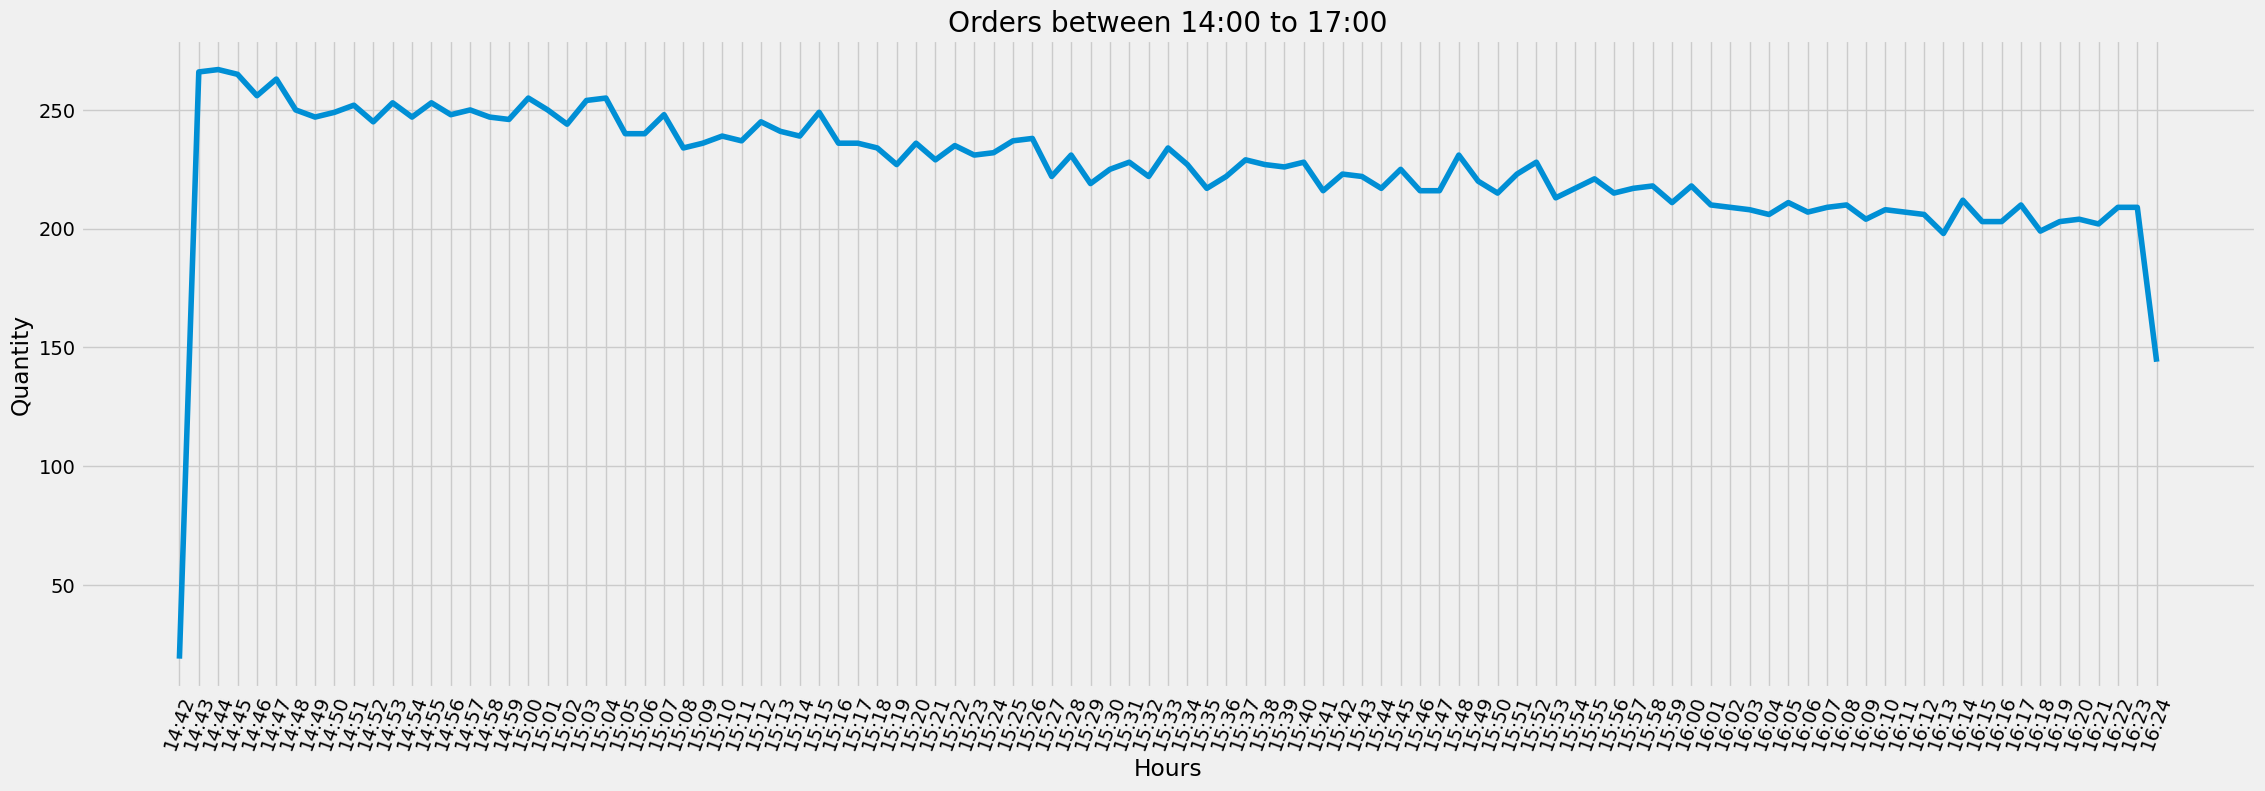

In [13]:
h = data.groupby(['FinalHour'])['purchase_ID'].count()

plt.figure(figsize=(25,8))
plt.plot(h.index,h.values)
plt.title("Orders between 14:00 to 17:00")
plt.xlabel("Hours")
plt.ylabel("Quantity")
plt.xticks(rotation=70)
plt.show()

In [14]:
print(data['Delivery Price'].describe(),'\n\n',data['Purchase Price'].describe(),'\n\n',data['Total'].describe())

count    23230.000000
mean      4901.450710
std       1147.284454
min       3000.000000
25%       3900.000000
50%       4900.000000
75%       5900.000000
max       6800.000000
Name: Delivery Price, dtype: float64 

 count    23230.000000
mean     28588.240207
std      16845.880909
min       7500.000000
25%      13600.000000
50%      24300.000000
75%      37900.000000
max      70000.000000
Name: Purchase Price, dtype: float64 

 count    23230.000000
mean     33489.690917
std      16867.159241
min      10500.000000
25%      18900.000000
50%      29600.000000
75%      42600.000000
max      76800.000000
Name: Total, dtype: float64


In [15]:
dfvalue = data[['Delivery Price','Purchase Price', 'Total']]

plt.figure(figsize=(20,10))
plt.boxplot(dfvalue,vert=0,patch_artist=True)
plt.yticks([1,2,3],["Delivery", "Purchase", "Total"])
plt.show()

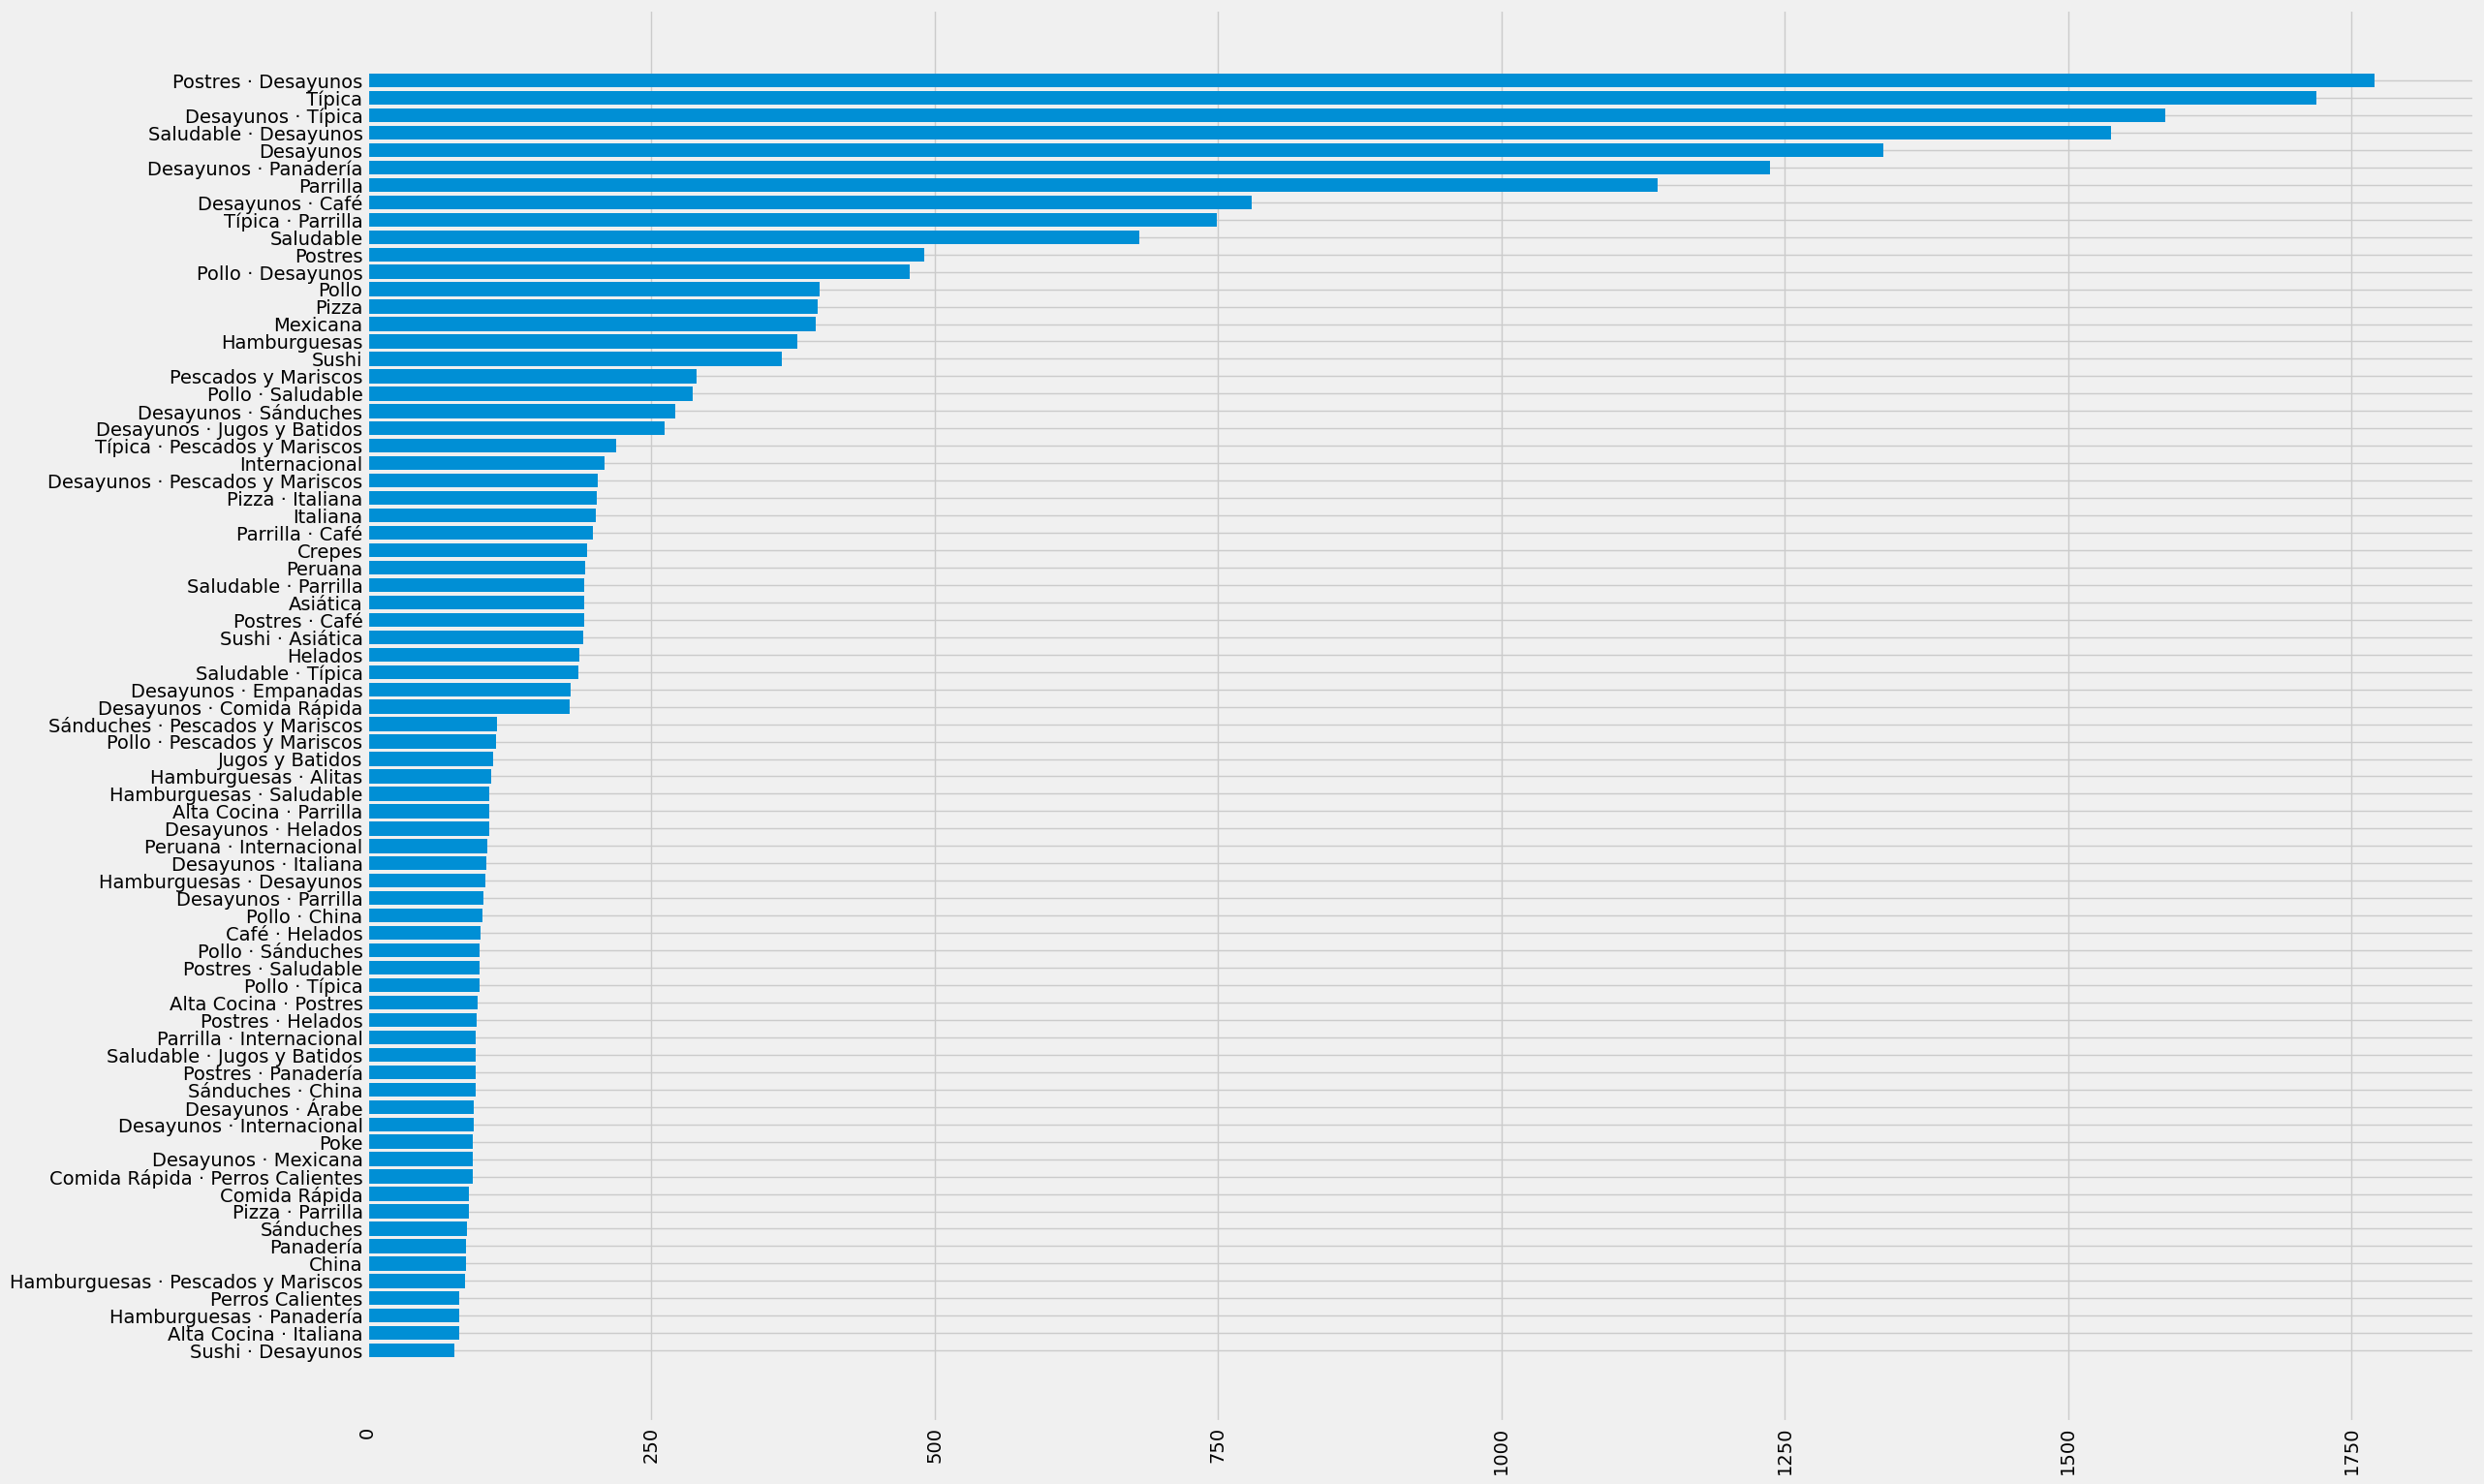

In [16]:
cpe = data.groupby(['Category'])['purchase_ID'].count().sort_values()

plt.figure(figsize=(25,18))
plt.barh(cpe.index,cpe.values)
plt.xticks(rotation=90)
plt.show()

# Clustering 👽

In [19]:
dfc = data[['purchase_ID','Total']]
np.round(dfc.describe(),2)

purchase_ID     Total
count     23230.00  23230.00
mean      11615.50  33489.69
std        6706.07  16867.16
min           1.00  10500.00
25%        5808.25  18900.00
50%       11615.50  29600.00
75%       17422.75  42600.00
max       23230.00  76800.00

## Normalization 🔢

In [21]:
data_norm = (dfc-dfc.min())/(dfc.max()-dfc.min())
np.round(data_norm,2)

purchase_ID  Total
0              0.0   0.06
1              0.0   0.76
2              0.0   0.05
3              0.0   0.28
4              0.0   0.04
...            ...    ...
23225          1.0   0.04
23226          1.0   0.38
23227          1.0   0.28
23228          1.0   0.49
23229          1.0   0.17

[23230 rows x 2 columns]

## Looking for the right quantity of clusters 🦾

In [24]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters = i, max_iter=300)
  kmeans.fit(data_norm)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

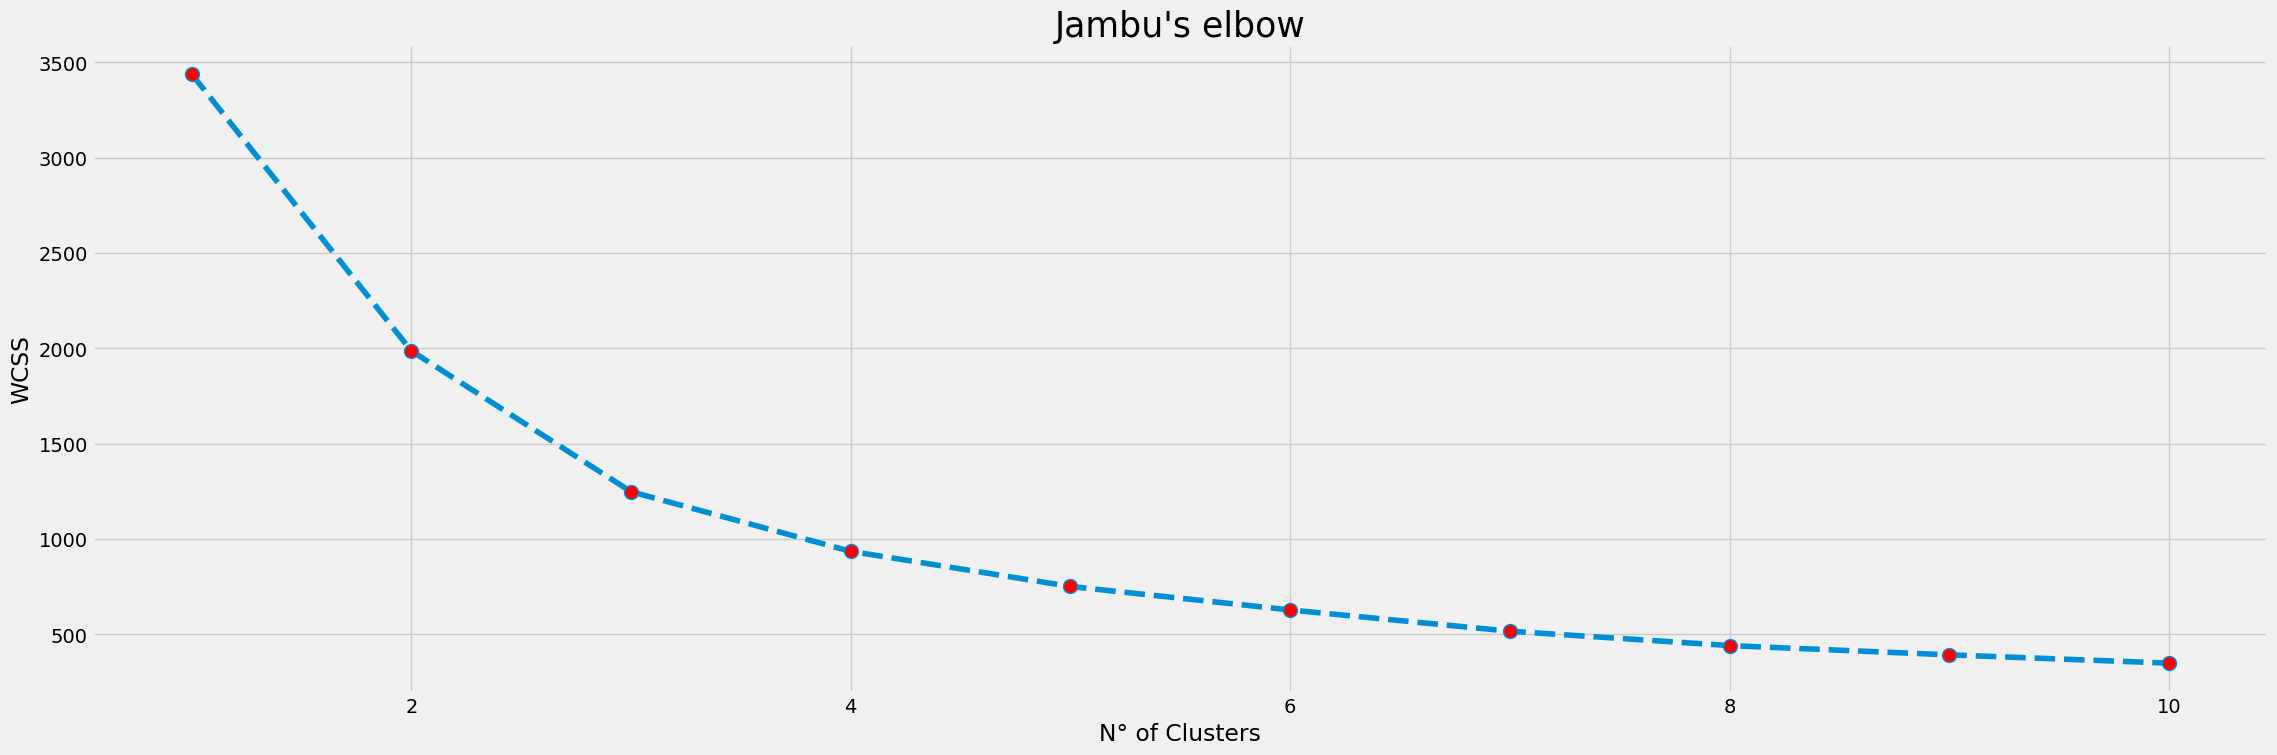

In [44]:
from matplotlib import markers
plt.figure(figsize=(25,8))
plt.plot(range(1,11),wcss,"--",marker="o", mfc='r', ms=10)
plt.title("Jambu's elbow", fontsize=25)
plt.xlabel("N° of Clusters")
plt.ylabel("WCSS")
plt.show()

In [45]:
clustering = KMeans(n_clusters=4,max_iter=300)
clustering.fit(data_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [80]:
data['KMeans_clusters'] = clustering.labels_
data.head(5)

Unnamed: 0  purchase_ID            Date at created  \
0           0            1 2020-10-21 14:42:55.373979   
1           1            2 2020-10-21 14:42:55.483563   
2           2            3 2020-10-21 14:42:55.739536   
3           3            4 2020-10-21 14:42:55.945560   
4           4            5 2020-10-21 14:42:56.201561   

                   Category                   Name  Purchase Price  \
0     Saludable · Desayunos       Distrito Gourmet           10700   
1                   Postres      Toledo Pastelería           53900   
2         Postres · Helados                   Mahé            7500   
3  Hamburguesas · Saludable         Restaurant Inn           23000   
4       Postres · Desayunos  Maria Luisa - Postres            9000   

   Delivery Price  Total Hour Minutes FinalHour  KMenas_clusters  \
0            3700  14400   14      42     14:42                2   
1            6800  60700   14      42     14:42                1   
2            6000  13500   14      42     14:42                2   
3            6100  29100   14      42     14:42                2   
4            4300  13300   14      42     14:42                2   

   KMeans_clusters  
0                2  
1                1  
2                2  
3                2  
4                2

## Plot clusters 💹

In [81]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pcaRappi = pca.fit_transform(data_norm)
DFpcaRappi = pd.DataFrame(data=pcaRappi, columns=['Component_1', 'Component_2'])
pcaRappiTotal = pd.concat([DFpcaRappi,data[['KMeans_clusters']]], axis=1)
pcaRappiTotal['Category'] = data['Category']

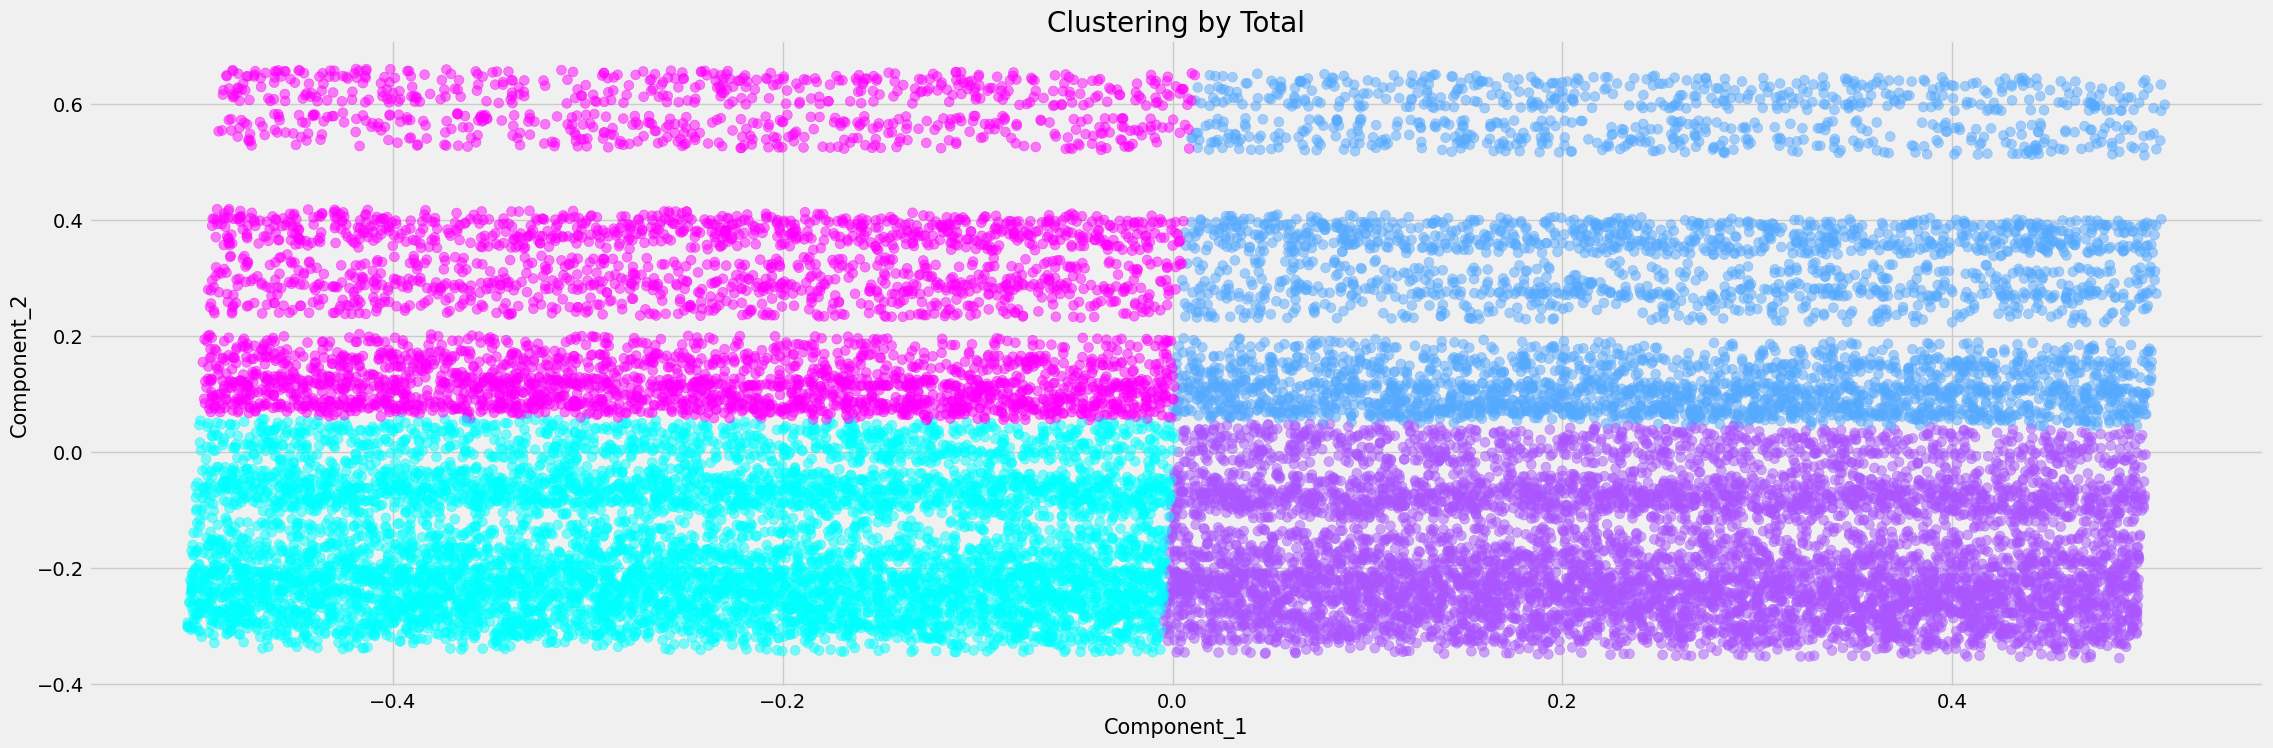

In [75]:
fig = plt.figure(figsize=(25,8))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Component_1", fontsize=15)
ax.set_ylabel("Component_2", fontsize=15)
ax.set_title("Clustering by Total", fontsize=20)

ax.scatter(x=pcaRappiTotal.Component_1, y=pcaRappiTotal.Component_2, c= pcaRappiTotal.KMenas_clusters,s=50, cmap='cool', alpha=0.5)


In [88]:
px.scatter(x=pcaRappiTotal.Component_1, y=pcaRappiTotal.Component_2, color=pcaRappiTotal.KMeans_clusters,hover_name=pcaRappiTotal['Category'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23230 entries, 0 to 23229
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       23230 non-null  int64         
 1   purchase_ID      23230 non-null  int64         
 2   Date at created  23230 non-null  datetime64[ns]
 3   Category         23230 non-null  object        
 4   Name             23230 non-null  object        
 5   Purchase Price   23230 non-null  int64         
 6   Delivery Price   23230 non-null  int64         
 7   Total            23230 non-null  int64         
 8   Hour             23230 non-null  object        
 9   Minutes          23230 non-null  object        
 10  FinalHour        23230 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 1.9+ MB
